In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Pepinot\AppData\Local\Temp\ipykernel_5784\2011421623.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r'C:\Users\Pepinot\Documents\Henry\Modulos\PROYECTO INDIVIDUAL 2\EDA_Totales\Pais.csv')

En este apartado vamos a dar comienzo al analisis exploratorio de los datos referentes al pais entre los años 2019-2024

# Vision general de los datos

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           21 non-null     int64  
 1   Trimestre                     21 non-null     int64  
 2   Ingresos                      21 non-null     float64
 3   Accesos por cada 100 hogares  21 non-null     float64
 4   Accesos por cada 100 hab      21 non-null     float64
 5   ADSL                          21 non-null     float64
 6   Cablemodem                    21 non-null     float64
 7   Fibra óptica                  21 non-null     float64
 8   Wireless                      21 non-null     float64
 9   Otros accesos                 21 non-null     float64
 10  Total accesos                 21 non-null     float64
 11  Hasta 512 kbps                21 non-null     float64
 12  Entre 512 Kbps y 1 Mbps       21 non-null     float64
 13  Entre 1

In [3]:
#Detección de valores nulos y faltantes

print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nPorcentaje de valores nulos por columna:")
print(df.isnull().sum() / len(df) * 100)

Valores nulos por columna:
Año                             0
Trimestre                       0
Ingresos                        0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
ADSL                            0
Cablemodem                      0
Fibra óptica                    0
Wireless                        0
Otros accesos                   0
Total accesos                   0
Hasta 512 kbps                  0
Entre 512 Kbps y 1 Mbps         0
Entre 1 Mbps y 6 Mbps           0
Entre 6 Mbps y 10 Mbps          0
Entre 10 Mbps y 20 Mbps         0
Entre 20 Mbps y 30 Mbps         0
Más de 30 Mbps                  0
Otras velocidades               0
Total velocidades               0
dtype: int64

Porcentaje de valores nulos por columna:
Año                             0.0
Trimestre                       0.0
Ingresos                        0.0
Accesos por cada 100 hogares    0.0
Accesos por cada 100 hab        0.0
ADSL                            0.0
Cablemodem            

In [4]:
#Detección de duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")



Número de filas duplicadas: 0


In [6]:
#Detección de outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
    return outliers

columnas_numericas = df.select_dtypes(include=[np.number]).columns

for columna in columnas_numericas:
    outliers = detectar_outliers(df, columna)
    print(f"\nOutliers en {columna}:")
    print(outliers[[columna, 'Año', 'Trimestre']])


Outliers en Año:
Empty DataFrame
Columns: [Año, Año, Trimestre]
Index: []

Outliers en Trimestre:
Empty DataFrame
Columns: [Trimestre, Año, Trimestre]
Index: []

Outliers en Ingresos:
        Ingresos   Año  Trimestre
19  1.673760e+08  2023          4
20  2.804191e+08  2024          1

Outliers en Accesos por cada 100 hogares:
Empty DataFrame
Columns: [Accesos por cada 100 hogares, Año, Trimestre]
Index: []

Outliers en Accesos por cada 100 hab:
Empty DataFrame
Columns: [Accesos por cada 100 hab, Año, Trimestre]
Index: []

Outliers en ADSL:
Empty DataFrame
Columns: [ADSL, Año, Trimestre]
Index: []

Outliers en Cablemodem:
Empty DataFrame
Columns: [Cablemodem, Año, Trimestre]
Index: []

Outliers en Fibra óptica:
Empty DataFrame
Columns: [Fibra óptica, Año, Trimestre]
Index: []

Outliers en Wireless:
Empty DataFrame
Columns: [Wireless, Año, Trimestre]
Index: []

Outliers en Otros accesos:
Empty DataFrame
Columns: [Otros accesos, Año, Trimestre]
Index: []

Outliers en Total accesos:
Empt

En la columna trimestre observamos dos outliers interesantes:

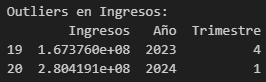

Vamos a observarlo en un grafico

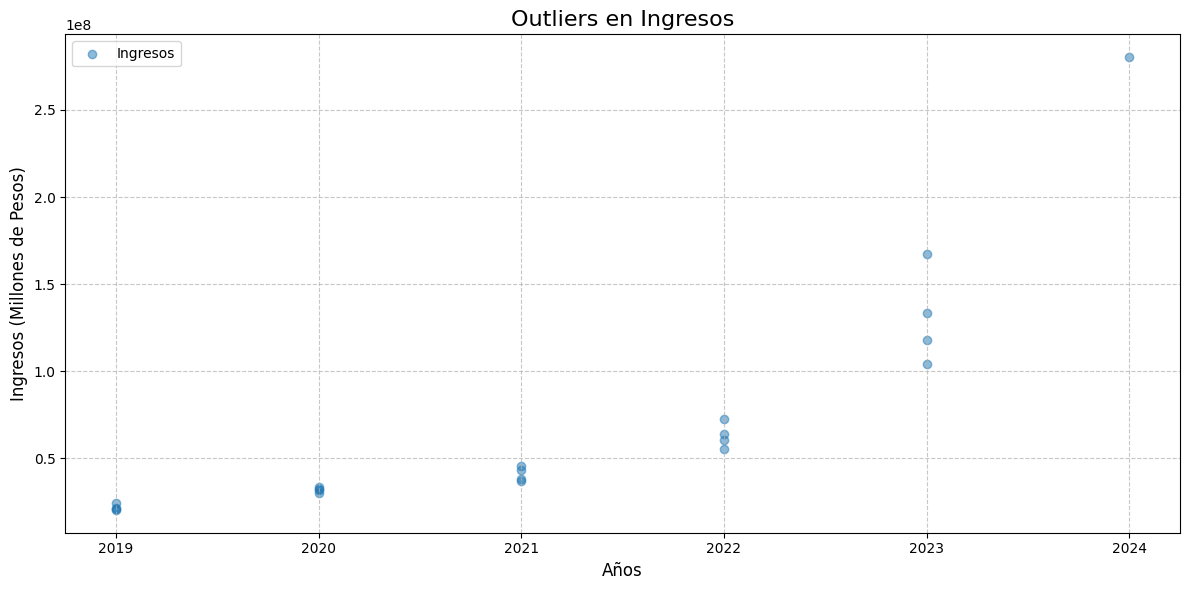

In [25]:
#Primero calculamos los umbrales para outliers
def visualizar_outliers_ingresos(df):

    Q1 = df['Ingresos'].quantile(0.25)
    Q3 = df['Ingresos'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

#Graficamos
plt.figure(figsize=(12, 6))

plt.scatter(df['Año'], df['Ingresos'], alpha=0.5, label='Ingresos')

plt.title('Outliers en Ingresos', fontsize=16)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Ingresos (Millones de Pesos)', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(np.arange(df['Año'].min(), df['Año'].max()+1, 1.0))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Estos outliers nos muestran buenas noticias para la empresa ya que año a año se superan en ingresos.